# Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
#importing dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1.Load the dataset into python environment and make ‘PassengerId’ as the index column.

In [2]:
data=pd.read_csv(r'C:\Users\Aswin G Sankar\titanic_dataset.csv',index_col='PassengerId')

In [3]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# 3.Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4.Fill in all the missing values present in all the columns in the dataset

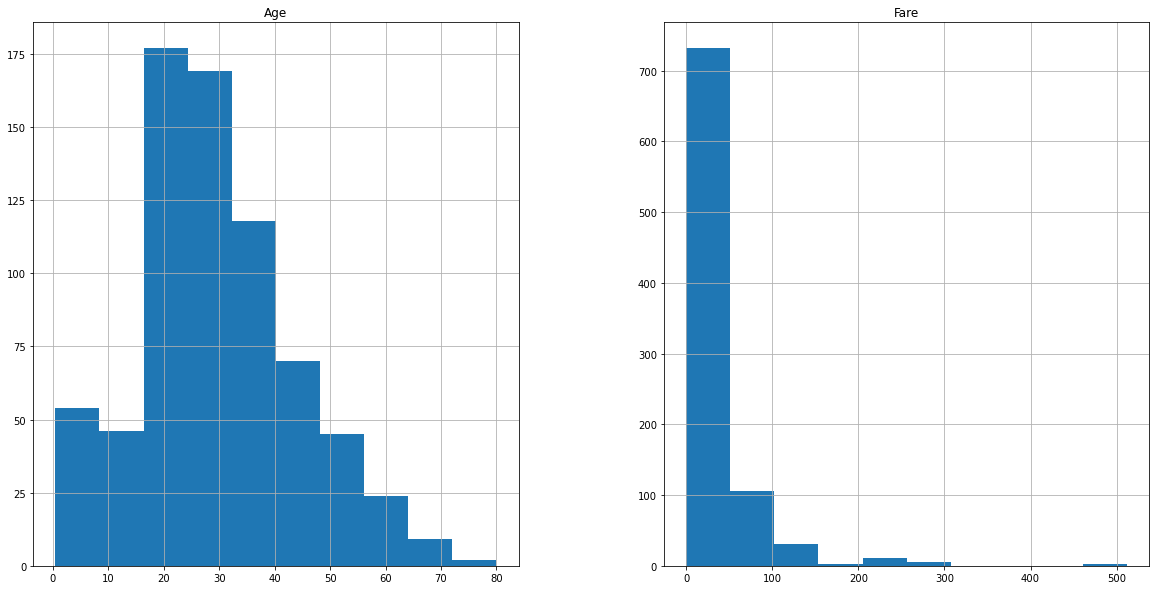

In [8]:
freq=data.select_dtypes(include=['float'])
freq.hist(figsize=(20,10))
plt.show()

### conclusion:
Since the histogram is right skewed we can take the median for filling the Missing values.

In [9]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#the column age is filled using mean values
data['Age']= data['Age'].fillna(data['Age'].median())

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Result:
The NaN values in all the columns has been filled with mode and median values.

# 5.Check and handle outliers in at least 3 columns in the dataset

The colums 3 which contibute to analysis is AGE,FARE,SIBSP.Outliers of those columns are handled below.

### a."AGE" Column

Text(0.5, 1.0, 'box plot')

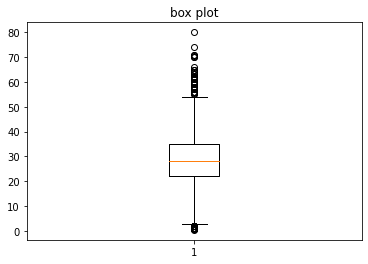

In [14]:
plt.boxplot(data['Age'])
plt.title('box plot')

In [15]:
q1=np.percentile(data['Age'],25,interpolation='midpoint')
q2=np.percentile(data['Age'],50,interpolation='midpoint')
q3=np.percentile(data['Age'],75,interpolation='midpoint')

In [16]:
data['Age'].median()

28.0

In [17]:
IQR=q3-q1
IQR

13.0

In [18]:
low=q1-1.5*IQR
upp=q3+1.5*IQR

In [19]:
outlier=[]
for x in data['Age']:
    if((x>upp)or(x<low)):
      outlier.append(x)

In [20]:
out1=data['Age']>upp

In [21]:
data.loc[out1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [22]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

Text(0.5, 1.0, 'box plot')

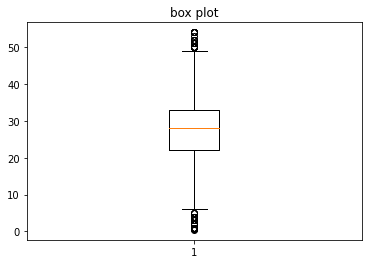

In [23]:
plt.boxplot(data['Age'])
plt.title('box plot')

### b."Fare" Column

Text(0.5, 1.0, 'box plot')

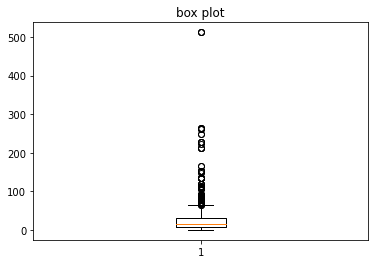

In [24]:
plt.boxplot(data['Fare'])
plt.title('box plot')

In [25]:
q1=np.percentile(data['Fare'],25,interpolation='midpoint')
q2=np.percentile(data['Fare'],50,interpolation='midpoint')
q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [26]:
data['Fare'].median()

14.1083

In [27]:
IQR=q3-q1
IQR

22.6042

In [28]:
low=q1-1.5*IQR
upp=q3+1.5*IQR

In [29]:
outlier=[]
for x in data['Fare']:
    if((x>upp)or(x<low)):
      outlier.append(x)

In [30]:
out1=data['Fare']>upp
het=data.loc[out1].index

In [31]:
data.drop(het,inplace=True)

Text(0.5, 1.0, 'box plot')

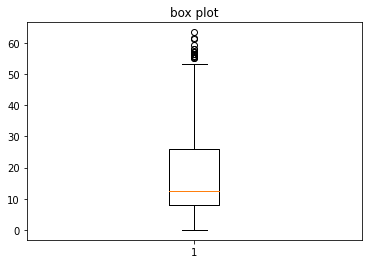

In [32]:
plt.boxplot(data['Fare'])
plt.title('box plot')

### c."SIBSP" column

Text(0.5, 1.0, 'box plot')

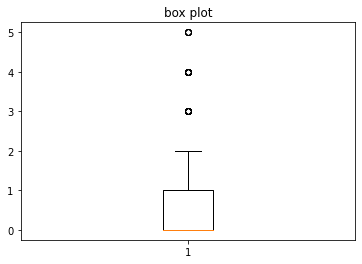

In [33]:
plt.boxplot(data['SibSp'])
plt.title('box plot')

In [34]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [35]:
data['SibSp'].median()

0.0

In [36]:
IQR=q3-q1
IQR

1.0

In [37]:
low=q1-1.5*IQR
upp=q3+1.5*IQR

In [38]:
outlier=[]
for x in data['SibSp']:
    if((x>upp)or(x<low)):
      outlier.append(x)

In [39]:
out1=data['SibSp']>upp
data.loc[out1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [40]:
data.drop([ 8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace=True)

Text(0.5, 1.0, 'box plot')

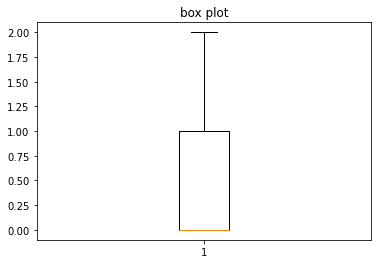

In [41]:
plt.boxplot(data['SibSp'])
plt.title('box plot')

# 6.Do min max scaling on the feature set (Take ‘Survived’ as target).

### Dummy encoding on sex and Embarked columns.

In [42]:
data_dummies=pd.get_dummies(data[['Sex','Embarked']])

In [43]:
data=pd.concat([data, data_dummies], axis=1)

In [44]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Regression analysis before min max scaling:

<AxesSubplot:>

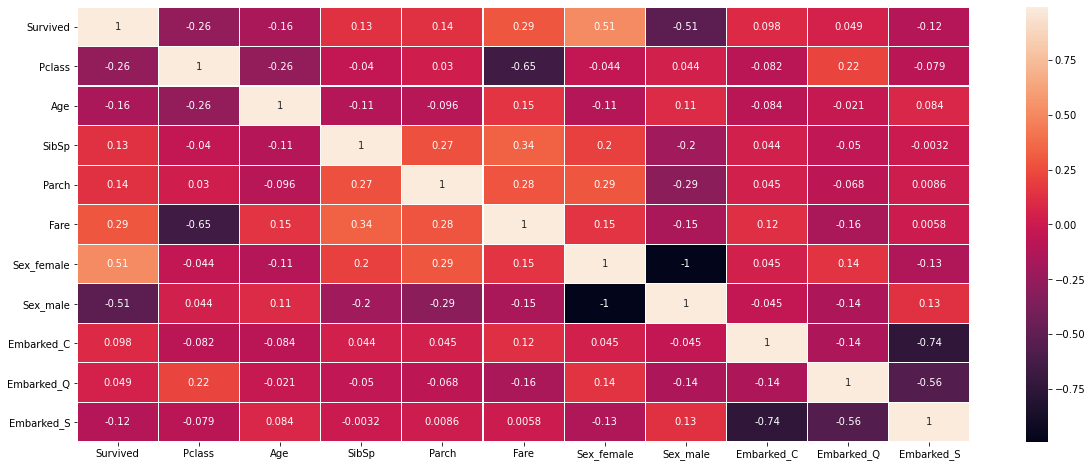

In [45]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.99,vmax=0.99,annot=True,linewidth=0.2)

In [46]:
data1=data.drop(['Name','Ticket','Cabin','Sex','Embarked'],axis=1)

In [47]:
y=data1["Survived"]
x=data1.drop(["Survived"],axis=1)

In [48]:
x.shape

(705, 10)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [50]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [51]:
model=lr.fit(x_train,y_train)

In [52]:
predictions=model.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
print('MSE is:\n',mean_squared_error(y_test,predictions))

MSE is:
 0.16882029919106153


In [55]:
from sklearn.metrics import r2_score

In [56]:
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.29724008060632934


In [57]:
#feature table discripion before min max scaling
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,2.492199,28.116667,0.283688,0.292199,16.779822,0.314894,0.685106,0.156028,0.096454,0.747518
std,0.721235,10.243244,0.512988,0.762963,13.139205,0.464803,0.464803,0.363140,0.295422,0.434745
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.879200,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,11.133300,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,1.000000,0.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,63.358300,1.000000,1.000000,1.000000,1.000000,1.000000


# Min Max Scaling

In [58]:
from sklearn import preprocessing

In [59]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)

In [60]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,705.000000,705.000000,705.000000,705.00000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.746099,0.516922,0.141844,0.04870,0.264840,0.314894,0.685106,0.156028,0.096454,0.747518
std,0.360618,0.191177,0.256494,0.12716,0.207379,0.464803,0.464803,0.363140,0.295422,0.434745
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.00000,0.124359,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.514744,0.000000,0.00000,0.175720,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.608063,0.500000,0.00000,0.378798,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Regression analysis after min max scaling:

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is:\n',mean_squared_error(y_test,predictions))

MSE is:
 0.16882029919106153


In [62]:
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.29724008060632934


### Conclusion:
   It is found that MSE value and R squared value after min max scaling is same as the value is found before min max scaling in the feature "survived".